**DATA SCIENCE INTERN @BHARAT INTERN**




# AUTHOR: SIDDHI NYATI

TASK 1: Stock Prediction

PURPOSE: Take the stock price of any company and predict its price by using LSTM.

# Dataset Description: Google Stock Historical Data

This dataset provides a historical record of Google's stock prices and associated attributes. It encompasses 14 columns and contains a smaller subset of 1257 rows. Each column signifies a specific characteristic, while each row holds the corresponding values for that attribute.
# The dataset's columns include:
1. Symbol: This column represents the company name, which is 'GOOG' in this context.
2. Date: This column records the date and year of the stock data.
3. Close: It denotes the closing price of Google's stock on a specific day.
4. High: This column captures the highest value achieved by Google's stock on the given day.
5. Low: It records the lowest value reached by Google's stock on the same day.
6. Open: This column contains the opening value of Google's stock on the specified day.
7. Volume: Here, you'll find the trading volume of Google's stock for that day, which indicates the number of shares traded.
8. adjClose: This attribute represents the adjusted closing price of Google's stock, considering factors like dividends and stock splits.
9. adjHigh: It tracks the adjusted highest value attained by Google's stock on a given day.
10. adjLow: This column stores the adjusted lowest value reached by Google's stock on the same day.
11. adjOpen: It shows the adjusted opening value of Google's stock for that day, accounting for various factors such as stock splits.
12. adjVolume: This attribute records the adjusted trading volume of Google's stock, considering factors like stock splits.
13. divCash: It denotes the amount of cash dividend paid to shareholders on a particular day.
14. splitFactor: This column indicates the split factor, if any, applied to Google's stock on that day. A split factor of 1 implies no stock split occurred.

# STEPS INVOLVED:
1. Begin by importing the necessary libraries and the dataset that will be used for analysis.
2. Conduct an exploratory data analysis to gain valuable insights from the dataset.
3. Prepare the data for analysis through data preprocessing, which may involve cleaning, transformation, and feature engineering.
4. Construct an LSTM (Long Short-Term Memory) model for predicting Google's stock prices.
5. Create visualizations to compare the actual stock prices with the model's predictions, facilitating a better understanding of the model's performance.
6. Utilize the LSTM model to forecast Google's stock prices for 15 days, offering insights into potential trends.

# STEP 1 : IMPORTING LIBRARIES AND DATA TO BE USED

In [1]:
#importing libraries to be used
import numpy as np # for linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # ignore warnings

from sklearn.preprocessing import MinMaxScaler # for normalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

from google.colab import files

uploaded = files.upload()
dataset = pd.read_csv('Task 1 DS.csv')

Saving Task 1 DS.csv to Task 1 DS.csv


In [35]:
dataset.head(10)

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


In [34]:
dataset.tail(10)

,open,close
date,,
2021-05-28,0.944464,0.940626
2021-06-01,0.944485,0.950473
2021-06-02,0.951665,0.945871
2021-06-03,0.929932,0.936876
2021-06-04,0.944766,0.962317
2021-06-07,0.960300,0.970049
2021-06-08,0.975716,0.979092
2021-06-09,0.986289,0.983705
2021-06-10,0.983327,1.000000


# STEP 2 : GATHERING INSIGHTS

In [3]:
print("Shape of data:",dataset.shape)

Shape of data: (1258, 14)


In [4]:
dataset.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [6]:
dataset.isnull().sum()

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

**There are no null values in the dataset**

In [7]:
dataset = dataset[['date','open','close']]
dataset['date'] = pd.to_datetime(dataset['date'].apply(lambda x: x.split()[0]))
dataset.set_index('date',drop=True,inplace=True)
dataset.head(10)

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71
2016-06-21,698.40,695.94
2016-06-22,699.06,697.46
2016-06-23,697.45,701.87
2016-06-24,675.17,675.22


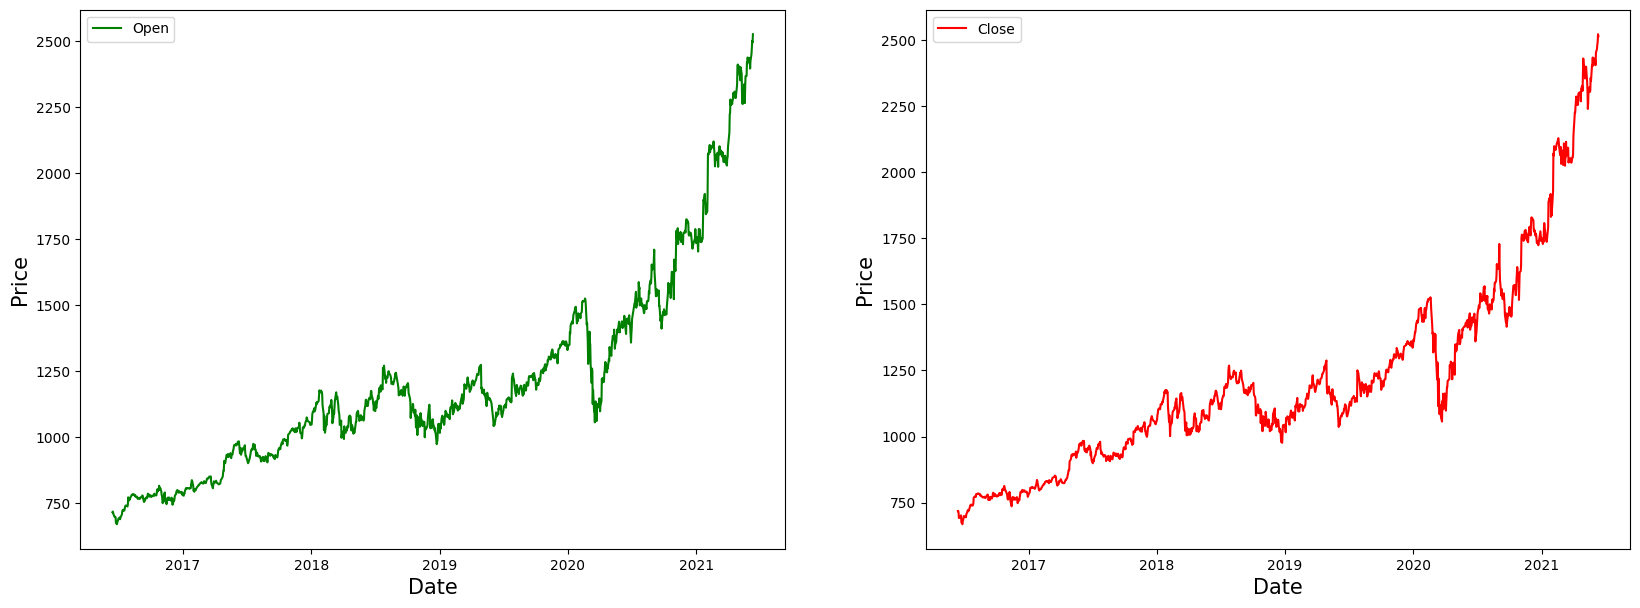

In [8]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(dataset['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(dataset['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()


# STEP 3 : DATA PRE-PROCESSING

In [11]:
MMS = MinMaxScaler()
dataset[dataset.columns] = MMS.fit_transform(dataset)
dataset.head(10)

,open,close
date,,
2016-06-14,0.024532,0.026984
2016-06-15,0.025891,0.027334
2016-06-16,0.023685,0.022716
2016-06-17,0.020308,0.012658
2016-06-20,0.014979,0.013732
2016-06-21,0.014779,0.014935
2016-06-22,0.015135,0.015755
2016-06-23,0.014267,0.018135
2016-06-24,0.002249,0.003755


In [12]:
training_size = round(len(dataset) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

944

In [14]:
train_data = dataset[:training_size]
test_data  = dataset[training_size:]

train_data.shape, test_data.shape

((944, 2), (314, 2))

In [15]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [16]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((894, 50, 2), (894, 2), (264, 50, 2), (264, 2))

# STEP 4 : CREATING LSTM MODEL

In [17]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
28/28 [==============================] - 8s 91ms/step - loss: 0.0108 - mean_absolute_error: 0.0773 - val_loss: 0.0419 - val_mean_absolute_error: 0.1826
Epoch 2/100
28/28 [==============================] - 1s 53ms/step - loss: 0.0012 - mean_absolute_error: 0.0275 - val_loss: 0.0062 - val_mean_absolute_error: 0.0634
Epoch 3/100
28/28 [==============================] - 2s 55ms/step - loss: 4.7844e-04 - mean_absolute_error: 0.0164 - val_loss: 0.0016 - val_mean_absolute_error: 0.0312
Epoch 4/100
28/28 [==============================] - 2s 53ms/step - loss: 4.3434e-04 - mean_absolute_error: 0.0154 - val_loss: 0.0020 - val_mean_absolute_error: 0.0340
Epoch 5/100
28/28 [==============================] - 2s 55ms/step - loss: 4.3052e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0032 - val_mean_absolute_error: 0.0438
Epoch 6/100
28/28 [==============================] - 2s 70ms/step - loss: 4.0734e-04 - mean_absolute_error: 0.0150 - val_loss: 0.0036 - val_mean_absolute_error: 0.0467


In [19]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

9/9 [==============================] - 1s 17ms/step


array([[0.40672588, 0.4089133 ],
       [0.40527984, 0.40751567],
       [0.40130803, 0.4034978 ],
       [0.407401  , 0.4093529 ],
       [0.41076466, 0.41271734]], dtype=float32)

In [20]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[1425.0372, 1426.1155],
       [1422.3563, 1423.5251],
       [1414.9929, 1416.0786],
       [1426.2888, 1426.9302],
       [1432.5248, 1433.1656]], dtype=float32)

# STEP 5 : VISUALIZING ACTUAL VS PREDICTED DATA

In [22]:
df_merge = pd.concat([dataset.iloc[-264:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=dataset.iloc[-264:].index)], axis=1)

In [23]:
df_merge[['open','close']] = MMS.inverse_transform(df_merge[['open','close']])
df_merge.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-05-27,1417.25,1417.84,1425.037231,1426.115479
2020-05-28,1396.86,1416.73,1422.356323,1423.525146
2020-05-29,1416.94,1428.92,1414.992920,1416.078613
2020-06-01,1418.39,1431.82,1426.288818,1426.930176
2020-06-02,1430.55,1439.22,1432.524780,1433.165649


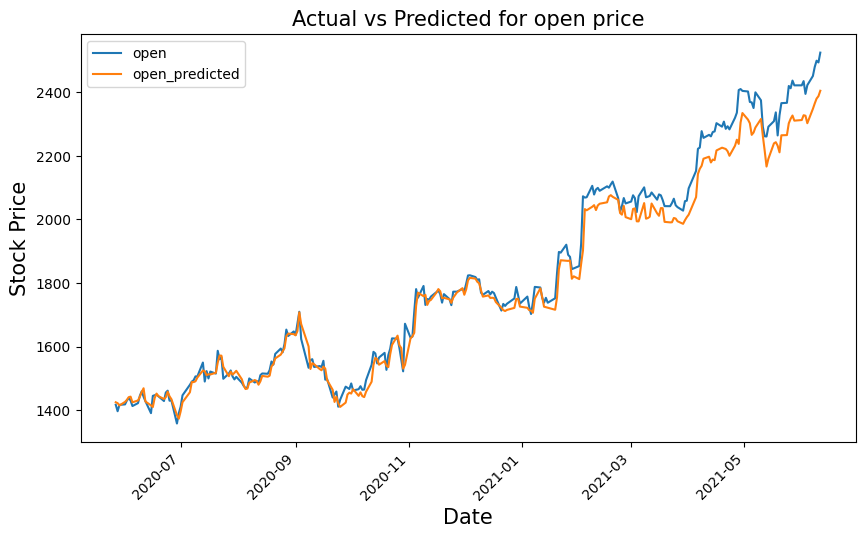

In [24]:
# plotting the actual open and predicted open prices on date index
df_merge[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

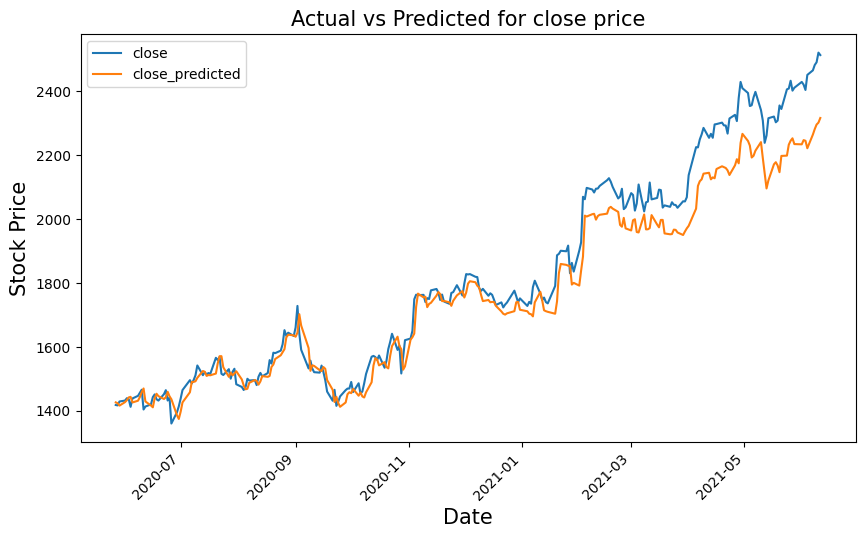

In [25]:
# plotting the actual close and predicted close prices on date index
df_merge[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

# STEP 6. PREDICTING UPCOMING 10 DAYS

In [26]:

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.50,2491.40,2380.321777,2296.341797
2021-06-10,2494.01,2521.60,2387.890869,2302.312256
2021-06-11,2524.92,2513.93,2404.963623,2316.885254
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [27]:
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [28]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 30ms/step


In [29]:
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

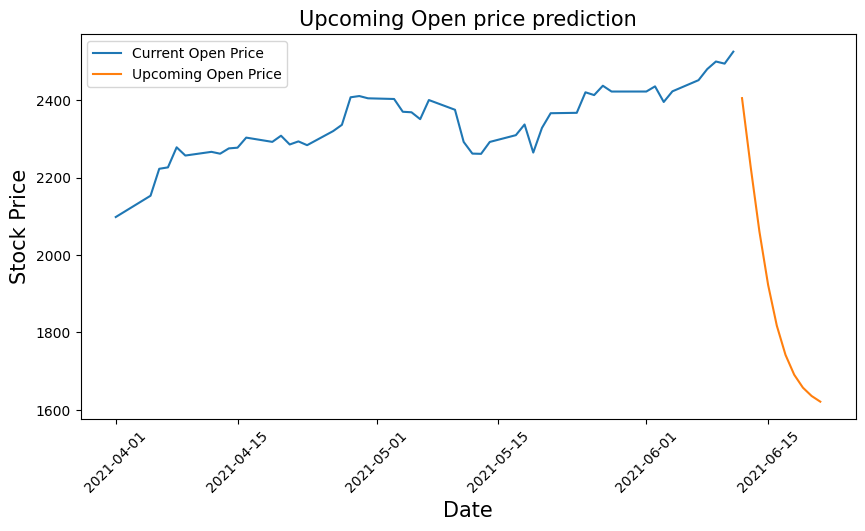

In [30]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

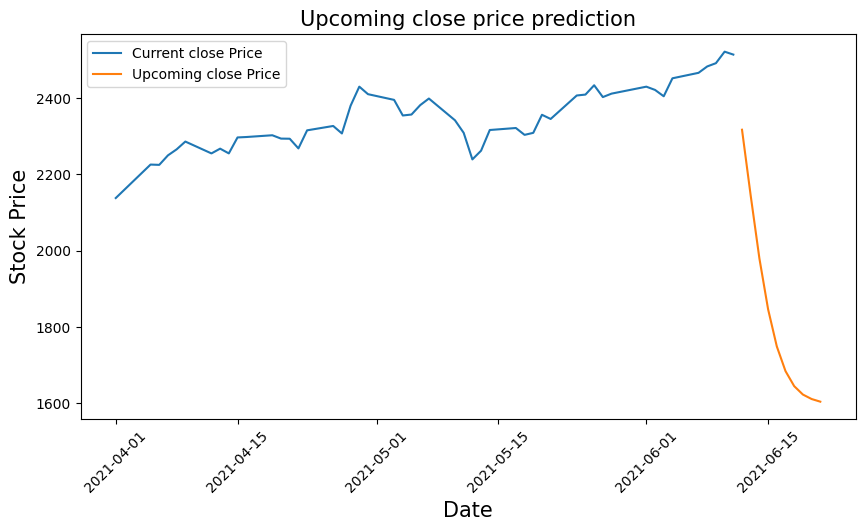

In [31]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()

# **DONE!!!**